In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
#pd.set_option('display.max_rows', None)
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = study_data_complete[study_data_complete.duplicated()]

duplicate


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseID = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989", ["Mouse ID",
    "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
duplicate_mouseID
    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

drooping_duplicate = study_data_complete.drop((study_data_complete).index[(study_data_complete)['Mouse ID'] == 'g989'])
drooping_duplicate.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(drooping_duplicate['Mouse ID'].unique())

248

In [7]:
mean = study_data_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median = study_data_complete.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance = study_data_complete.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
standard_deviation = study_data_complete.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
standard_error = study_data_complete.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]




summary_table = pd.DataFrame({"Mean Tumor Volume": mean, 
                                 "Median Tumor Volume": median, 
                                 "Tumor Volume Variance": variance,
                                 "Tumor Volume Std. Dev." :standard_deviation,
                                 "Tumor Volume Std. Err" :standard_error 
                             })
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
one_line = study_data_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
one_line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

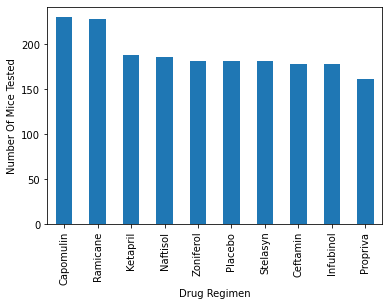

In [9]:
df = study_data_complete.groupby('Drug Regimen')
# Count how many times each road type appears in our group
count_df = df['Timepoint'].count()
#count_chart = count_df.plot(kind='bar', figsize=(6,4))
count_chart = count_df.sort_values(ascending=False).plot.bar(figsize=(6,4))
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number Of Mice Tested")
plt.show()

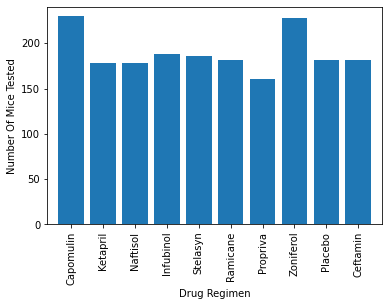

In [10]:
drugRegimen = study_data_complete['Drug Regimen'].unique()
Timepoint = study_data_complete.groupby('Drug Regimen')['Timepoint'].count()#.sort_values(ascending=False)

x_axis = np.arange(len(drugRegimen))


plt.bar(x_axis, Timepoint)
# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]


plt.xticks(tick_locations, drugRegimen, rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(Timepoint)+10)

plt.xlabel("Drug Regimen")
plt.ylabel("Number Of Mice Tested")
plt.show()

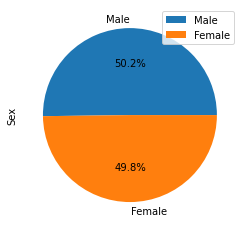

In [11]:
# Split up our data into groups based upon 'Home Library Definition' and 'Patron Type Definition'

# I know it's not identical to the one in the output but I get 125 male and 124 female

mice_female = study_data_complete[(study_data_complete["Sex"] == "Female")]
mice_male = study_data_complete[(study_data_complete["Sex"] == "Male")]

uniqueF = mice_female["Mouse ID"].unique()
uniqueM = mice_male["Mouse ID"].unique()

listSex = [len(uniqueM), len(uniqueF)]

labels = ["Male", "Female"]

df = pd.DataFrame({'listSex': [len(uniqueM), len(uniqueF)]},
                   index = ["Male", "Female"])
    
plot = df.plot(kind = "pie", y='listSex',autopct='%1.1f%%')

plot.set_ylabel("Sex")



plt.show()


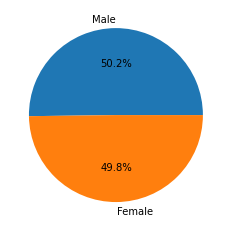

In [12]:
mice_female = study_data_complete[(study_data_complete["Sex"] == "Female")]
mice_male = study_data_complete[(study_data_complete["Sex"] == "Male")]

uniqueF = mice_female["Mouse ID"].unique()
uniqueM = mice_male["Mouse ID"].unique()

listSex = [len(uniqueM), len(uniqueF)]
labels = ["Male", "Female"]



chart = plt.pie(listSex, labels=labels, autopct="%1.1f%%")



plt.show()

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  


last = drooping_duplicate.groupby(["Mouse ID"]).max()["Timepoint"]
last = last.reset_index()


merge_df = pd.merge(last, drooping_duplicate, on=["Mouse ID", "Timepoint"], how="left")
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    lastCount = merge_df.loc[merge_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_list.append(lastCount)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = lastCount.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers= lastCount.loc[(lastCount < lower_bound)|(lastCount > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


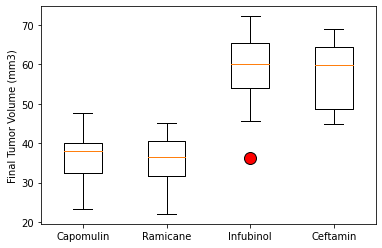

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
red = dict(marker='o', markerfacecolor='r', markersize=12,)
ax1.boxplot(tumor_vol_list, flierprops=red)
plt.xticks([1, 2, 3, 4], treatment_list)
ax1.set_ylabel('Final Tumor Volume (mm3)')
            
plt.show()

In [16]:
cap = merge_df.loc[merge_df['Drug Regimen']== 'Capomulin']
cap

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
19,b128,45,38.982878,2,Capomulin,Female,9,22
24,b742,45,38.939633,0,Capomulin,Male,7,21
61,f966,20,30.485985,0,Capomulin,Male,16,17
64,g288,45,37.074024,1,Capomulin,Male,3,19
66,g316,45,40.159220,2,Capomulin,Female,22,22
80,i557,45,47.685963,1,Capomulin,Female,1,24
83,i738,45,37.311846,2,Capomulin,Female,23,20
85,j119,45,38.125164,1,Capomulin,Female,7,23
87,j246,35,38.753265,1,Capomulin,Female,21,21
108,l509,45,41.483008,3,Capomulin,Male,17,21


<function matplotlib.pyplot.show(close=None, block=None)>

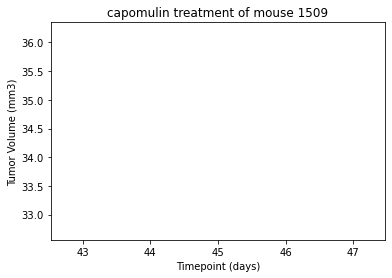

In [17]:
mousepicking = cap.loc[cap["Mouse ID"] == "t565"]

plt.plot(mousepicking["Timepoint"], mousepicking["Tumor Volume (mm3)"])
plt.title("capomulin treatment of mouse 1509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

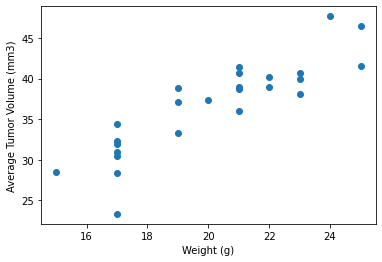

In [18]:
capAverage = cap.groupby("Mouse ID").mean()
plt.scatter(capAverage["Weight (g)"], capAverage["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show

The correlation between mouse weight and the average tumor volume is 0.88


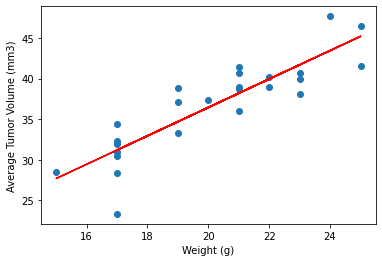

In [19]:
correlation = round(st.pearsonr(capAverage["Weight (g)"], capAverage["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation:,.2f}")
      
model = st.linregress(capAverage["Weight (g)"], capAverage["Tumor Volume (mm3)"])

yValues = capAverage["Weight (g)"] * model[0] + model[1]

plt.scatter(capAverage["Weight (g)"], capAverage["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.plot(capAverage["Weight (g)"], yValues, color="r")
plt.show()

In [ ]:
''